#CIFAR-100

169001437/169001437 [==============================] - 11s 0us/step
Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Number of classes: 100
Class labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


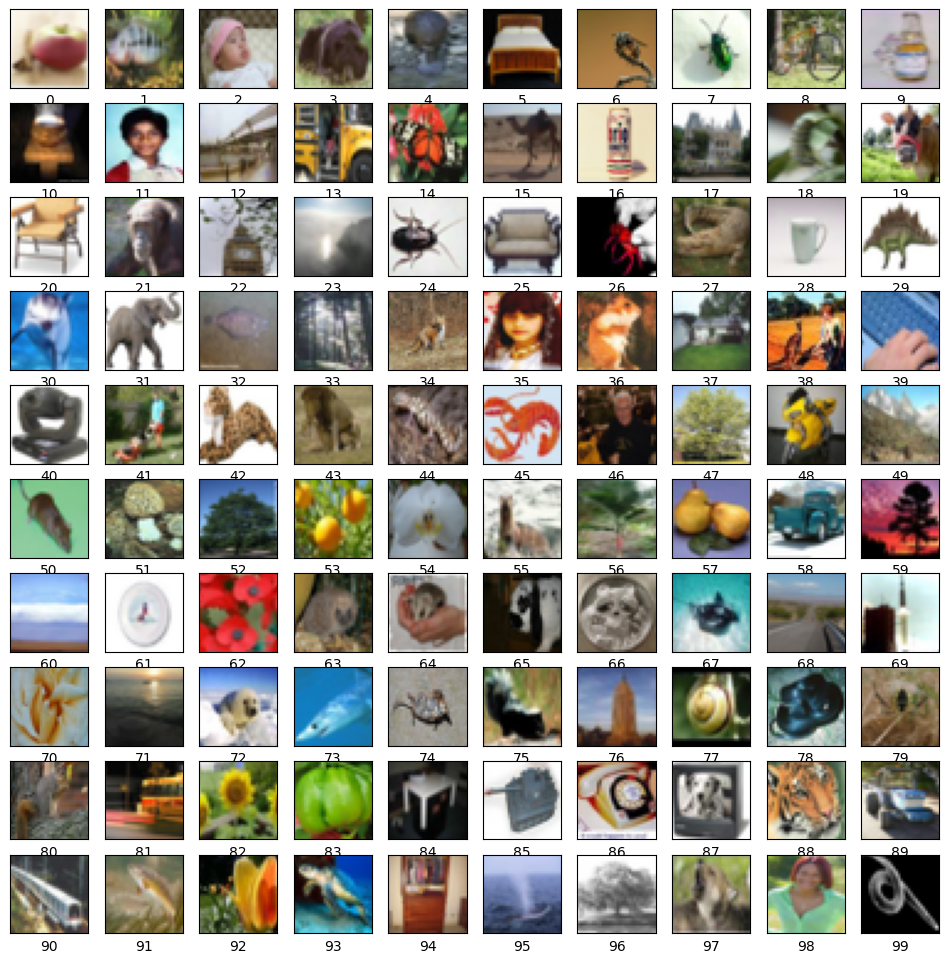

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-100 dataset
cifar100 = tf.keras.datasets.cifar100
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

# Check the shape of the data
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Explore class labels
unique_labels = np.unique(train_labels)
num_classes = len(unique_labels)
print("Number of classes:", num_classes)
print("Class labels:", unique_labels)

# Visualize example images from each class
plt.figure(figsize=(12, 12))
for i, label in enumerate(unique_labels):
    indices = np.where(train_labels == label)[0]
    image_index = indices[0]

    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[image_index], cmap=plt.cm.binary)
    plt.xlabel(str(label))
plt.show()


Epoch 1/2
1563/1563 [==============================] - 71s 45ms/step - loss: 3.9453 - accuracy: 0.0931 - val_loss: 3.4444 - val_accuracy: 0.1687
Epoch 2/2
1563/1563 [==============================] - 70s 45ms/step - loss: 3.2639 - accuracy: 0.2092 - val_loss: 3.1367 - val_accuracy: 0.2347
313/313 - 3s - loss: 3.1367 - accuracy: 0.2347 - 3s/epoch - 10ms/step

Test accuracy: 0.23469999432563782


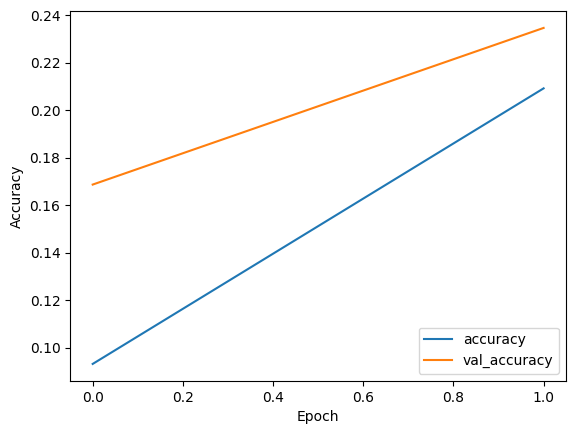

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(100, activation='softmax')  # 100 output classes for CIFAR-100
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [7]:
pip install tensorflow tensorflow-hub pillow


Saving 334289821-Baltimore_Oriole-Matthew_Plante.jpg to 334289821-Baltimore_Oriole-Matthew_Plante.jpg


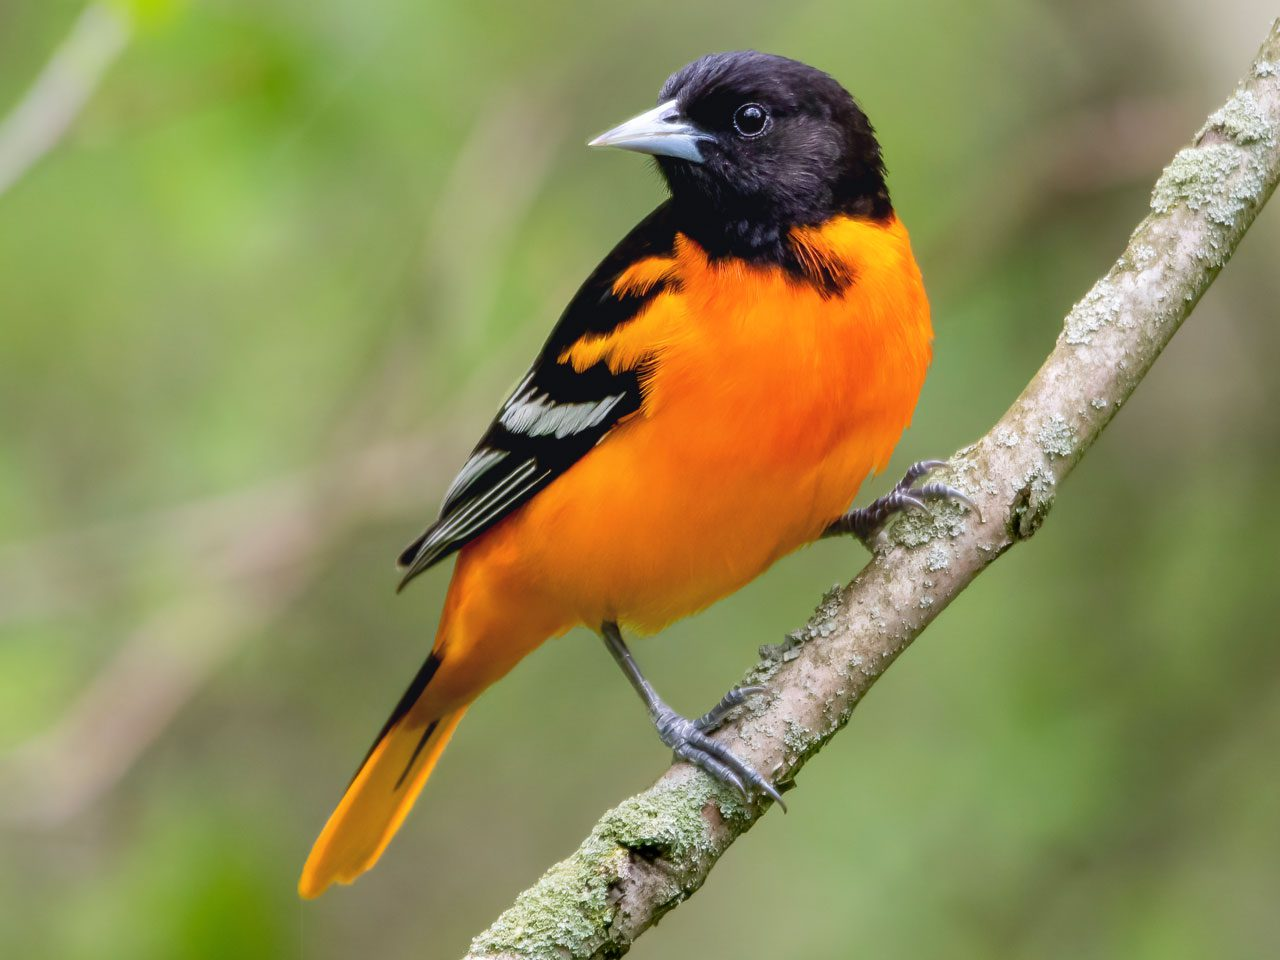

In [8]:
from google.colab import files
from PIL import Image
import IPython.display as display

# Upload an image file
uploaded = files.upload()

# Get the file name
file_name = list(uploaded.keys())[0]

# Save the uploaded file with a specific name (e.g., image.jpg)
saved_file_name = 'image.jpg'
with open(saved_file_name, 'wb') as f:
    f.write(uploaded[file_name])

# Display the uploaded image
img = Image.open(saved_file_name)
display.display(img)


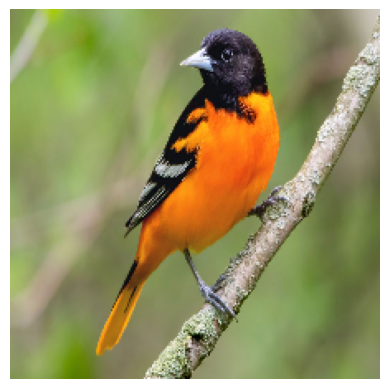

tf.Tensor(
[[[[-19.939003   20.221       3.3199997]
   [-19.939003   23.221       3.3199997]
   [-20.939003   25.221       3.3199997]
   ...
   [ 84.061      83.221      82.32     ]
   [ 85.061      84.221      83.32     ]
   [ 87.061      86.221      85.32     ]]

  [[-20.939003   19.221       2.3199997]
   [-19.939003   23.221       3.3199997]
   [-20.939003   25.221       3.3199997]
   ...
   [ 84.061      83.221      82.32     ]
   [ 85.061      84.221      83.32     ]
   [ 87.061      86.221      85.32     ]]

  [[-19.939003   20.221       3.3199997]
   [-20.939003   22.221       2.3199997]
   [-21.939003   24.221       2.3199997]
   ...
   [ 83.061      82.221      81.32     ]
   [ 85.061      84.221      83.32     ]
   [ 87.061      86.221      85.32     ]]

  ...

  [[-17.939003   32.221       9.32     ]
   [-18.939003   31.221       8.32     ]
   [-18.939003   31.221       8.32     ]
   ...
   [ -6.939003   25.221       9.32     ]
   [ -4.939003   25.221       9.32     ]
   [ 

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Load and preprocess the image
img_path = '/content/image.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
print(img_array)

print ('--------')

# Model inference
predictions = model.predict(img_array)
# Decode predictions
decoded_predictions = decode_predictions(predictions, top=3)[0]
print(decoded_predictions)


In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models, layers

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_tes andt) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build a simple neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the Fashion MNIST dataset
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4921 - accuracy: 0.8258 - val_loss: 0.4153 - val_accuracy: 0.8534
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3711 - accuracy: 0.8653 - val_loss: 0.3694 - val_accuracy: 0.8677
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3338 - accuracy: 0.8791 - val_loss: 0.3663 - val_accuracy: 0.8685
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3124 - accuracy: 0.8848 - val_loss: 0.3436 - val_accuracy: 0.8747
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2924 - accuracy: 0.8926 - val_loss: 0.3542 - val_accuracy: 0.8713
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2783 - accuracy: 0.8973 - val_loss: 0.3527 - val_accuracy: 0.8746
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - los

Saving brown-captoe-shoes-5.png to brown-captoe-shoes-5 (1).png


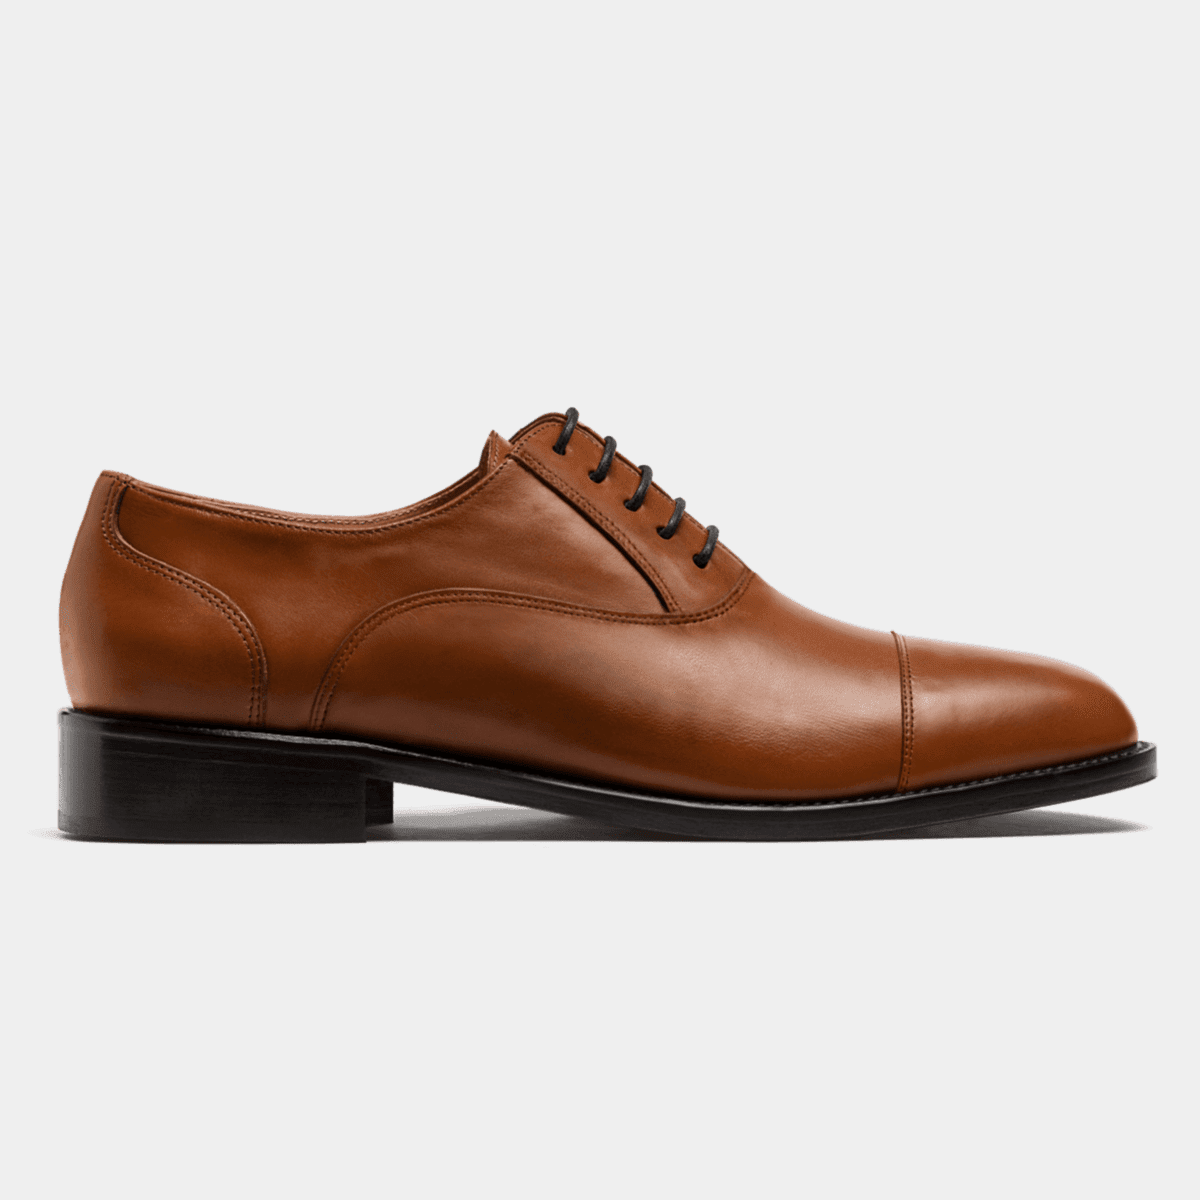

In [13]:
from google.colab import files
from PIL import Image
import IPython.display as display

# Upload an image file
uploaded = files.upload()

# Get the file name
file_name = list(uploaded.keys())[0]

# Save the uploaded file with a specific name (e.g., image.jpg)
saved_file_name = 'fashion.png'
with open(saved_file_name, 'wb') as f:
    f.write(uploaded[file_name])

# Display the uploaded image
img = Image.open(saved_file_name)
display.display(img)


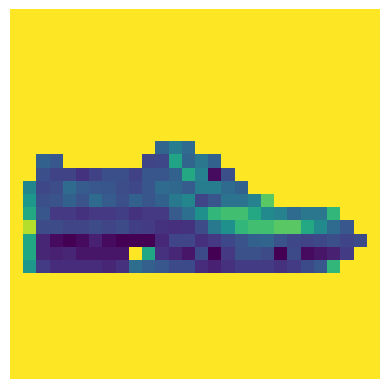

tf.Tensor(
[[[[0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]]

  [[0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]]

  [[0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.06274509]
   [0.062

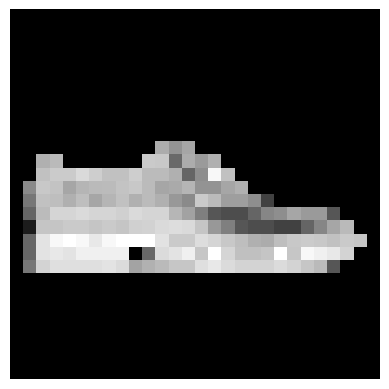

1/1 [==============================] - 0s 83ms/step
Predicted class: Sandal


In [15]:
# Load and preprocess the image
img_path = '/content/fashion.png'
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = tf.image.resize(img_array, [28, 28])
img_array = img_array / 255.0  # Normalize pixel values to be between 0 and 1
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
img_array = 1 - img_array  # Invert colors (if needed based on the model)

print(img_array)

# Display the resized image
plt.imshow(img_array[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()

# Model inference
predictions = model.predict(img_array)

# Get the predicted class label
predicted_class = tf.argmax(predictions[0]).numpy()

# Define class labels for Fashion MNIST
class_labels = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Display the predicted class
print("Predicted class:", class_labels[predicted_class])


In [16]:
pip install tensorflow scikit-learn


In [17]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load California Housing dataset
california_housing = fetch_california_housing()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build an ANN model for regression
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=1 was0, validation_data=(X_test_scaled, y_test), verbose=2)

# Evaluate the model on the test set
mse = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Mean Squared Error on Test Set:", mse)

# Make predictions on a few samples
sample_indices = [0, 1, 2]
sample_predictions = model.predict(X_test_scaled[sample_indices])
print("Sample Predictions:", sample_predictions)


Epoch 1/50
516/516 - 4s - loss: 1.2733 - val_loss: 0.6367 - 4s/epoch - 8ms/step
Epoch 2/50
516/516 - 1s - loss: 0.5519 - val_loss: 0.4803 - 1s/epoch - 3ms/step
Epoch 3/50
516/516 - 2s - loss: 0.4489 - val_loss: 0.4474 - 2s/epoch - 4ms/step
Epoch 4/50
516/516 - 1s - loss: 0.4170 - val_loss: 0.4183 - 1s/epoch - 2ms/step
Epoch 5/50
516/516 - 1s - loss: 0.4012 - val_loss: 0.4063 - 777ms/epoch - 2ms/step
Epoch 6/50
516/516 - 1s - loss: 0.3942 - val_loss: 0.3997 - 787ms/epoch - 2ms/step
Epoch 7/50
516/516 - 1s - loss: 0.3829 - val_loss: 0.3923 - 811ms/epoch - 2ms/step
Epoch 8/50
516/516 - 1s - loss: 0.3792 - val_loss: 0.3895 - 809ms/epoch - 2ms/step
Epoch 9/50
516/516 - 1s - loss: 0.3729 - val_loss: 0.3819 - 1s/epoch - 2ms/step
Epoch 10/50
516/516 - 1s - loss: 0.3675 - val_loss: 0.3754 - 1s/epoch - 2ms/step
Epoch 11/50
516/516 - 1s - loss: 0.3613 - val_loss: 0.3685 - 967ms/epoch - 2ms/step
Epoch 12/50
516/516 - 1s - loss: 0.3578 - val_loss: 0.3675 - 771ms/epoch - 1ms/step
Epoch 13/50
516/516

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate sample time series data
def generate_time_series(n):
    time = np.arange(n)
    sine_wave = np.sin(0.1 * time) + 0.2 * np.random.randn(n)
    return sine_wave

# Create a time series dataset
n_samples = 1000
time_series = generate_time_series(n_samples)

# Prepare the data for LSTM
sequence_length = 50
X, y = [], []

for i in range(n_samples - sequence_length):
    X.append(time_series[i:i+sequence_length])
    y.append(time_series[i+sequence_length])

X = np.array(X)
y = np.array(y)

# Reshape for LSTM input (batch_size, timesteps, features)
X = X.reshape(-1, sequence_length, 1)

# Build an LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=20, batch_size=32)

# Generate a new sequence for prediction
new_sequence = generate_time_series(sequence_length)

# Reshape for prediction
new_sequence = new_sequence.reshape(1, sequence_length, 1)

# Perform prediction
predicted_value = model.predict(new_sequence)

print("Predicted Value:", predicted_value[0, 0])


Epoch 1/20
30/30 [==============================] - 2s 20ms/step - loss: 0.3166
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1528
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0862
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0662
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0549
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0488
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0477
Epoch 8/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0481
Epoch 9/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0479
Epoch 10/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0469
Epoch 11/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0463
Epoch 12/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0457
Epoch 13/20
30/30 [==================

1/1 [==============================] - 0s 177ms/step
Predicted Value: -0.9365283


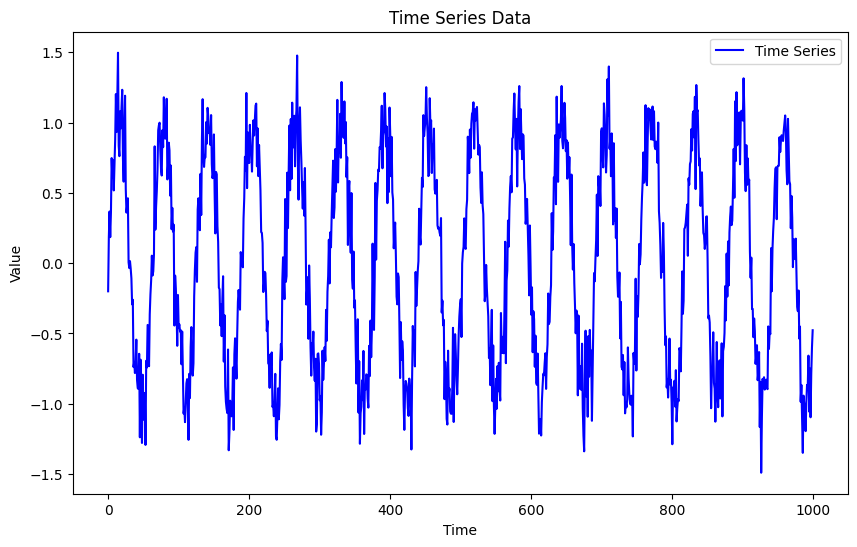

In [19]:
import matplotlib.pyplot as plt

# Assuming you have 'time_series' data
# ...

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Time Series', color='blue')
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
